# Exercise 9 - (E12.3)

Let us import the required modules:

In [1]:
import numpy as np

from matplotlib import pyplot as plt

## Point 1 and 2

Let's store the data as variables:

In [2]:
# Function quantities
A = np.array([[10, -6], [-6, 10]])
b = np.array([4, 4])

The eigenvalues of the A matrix can be easily computed solving the characteristic equation:

$$\begin{equation}
P \left(\lambda\right) = det\left(A - \lambda I \right) = 0
\end{equation}
$$

This is solved in the following code cell:

In [3]:
# Solve for eigenvalues
w, _ = np.linalg.eig(A)

print("lambda 1:", w[0], "\nlambda 2:", np.ceil(w[1]))

lambda 1: 16.0 
lambda 2: 4.0


The algorithm is stable if the following condition holds for each eigenvalue $\lambda_i$:

$$
\begin{equation}
|(1 + \gamma) - (1 - \gamma) \cdot \alpha \cdot \lambda_i| < 2 \sqrt{\gamma}
\end{equation}
$$

This can be checked through the use of the following implemented function that takes $\alpha$ and $\gamma$ as inputs:

In [4]:
def stability_check(alpha, gamma):
    # Left-hand side
    lhs1 = abs((1 + gamma) - (1 - gamma)*alpha*w[0])
    lhs2 = abs((1 + gamma) - (1 - gamma)*alpha*w[1])

    # Right-hand side
    rhs = 2 * np.sqrt(gamma)

    # Check element-wise
    return np.where((lhs1 >= rhs) | (lhs2 >= rhs), 0, 1)

To find suitable values for $\gamma$ in the two cases we will adopt a graphical method. We will therefore make a contour plot highlighting the regions of the $\alpha - \gamma$ space in which the algorithm will be either stable or unstable:

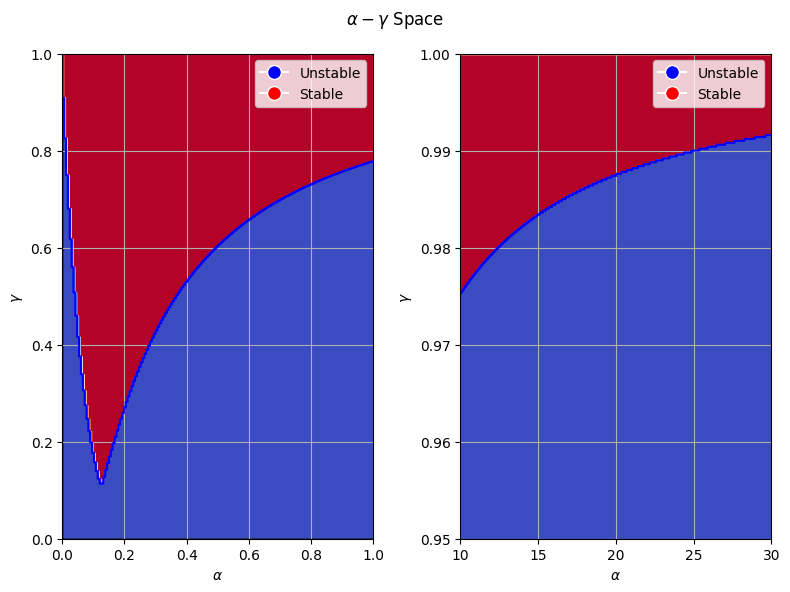

In [5]:
# Limits
alpha_lim = [[0, 30], [0, 1], [10, 30]]
gamma_lim = [[0, 1], [0, 1], [0.95, 1]]

# create a grid of x, y values
x_vals = np.linspace(*alpha_lim[0], 5000)
y_vals = np.linspace(*gamma_lim[0], 5000)
X, Y = np.meshgrid(x_vals, y_vals)

# Calculate function values for each x, y pair
Z = stability_check(X, Y)

# Create a figure and axes objects
_, axs = plt.subplots(1, 2, figsize=(8, 6))

# Loop through each subplot and create the plot
for i, ax in enumerate(axs):
    # Create a contour plot
    ax.contour(X, Y, Z, levels=[0, 1], colors=['blue', 'red'])

    # create a heatmap of the function values
    ax.imshow(Z, origin='lower', extent=[*alpha_lim[0], *gamma_lim[0]], cmap='coolwarm', aspect='auto')

    # Set the x and y limits of the plot
    ax.set_xlim(alpha_lim[i+1])
    ax.set_ylim(gamma_lim[i+1])

    # Origin axis
    ax.axhline(y=0, lw=2, color='k', alpha=0.5, zorder=0)
    ax.axvline(x=0, lw=2, color='k', alpha=0.5, zorder=0)

    # create a custom legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Unstable', markerfacecolor='blue', markersize=10),
                       plt.Line2D([0], [0], marker='o', color='w', label='Stable', markerfacecolor='red', markersize=10)]
    ax.legend(handles=legend_elements)

    # Set grid on
    ax.grid(True)

    # Plot options
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"$\gamma$")

# Display the plot
plt.suptitle(r"$\alpha - \gamma$ Space")
plt.tight_layout()
plt.show()

As can be seen in the plot above, for $\alpha = 0.2$ the minimum value of $\gamma$ that makes the algorithm stable is roughly $\gamma = 0.3$, while for $\alpha = 20$ the minimum allowable value of $\gamma$ is slightly less than $\gamma = 0.99$. To keep the choice of $\gamma$ far from the stability boundary we select the following values of momentum:

- $\gamma = 0.6$ for $\alpha = 0.2$
- $\gamma = 0.99$ for $\alpha = 20$

Finally, we perform a last check through the ___stability_check___ function defined before for both cases:

In [6]:
# For alpha = 0.2
stable1 = stability_check(0.2, 0.6)
print("alpha = 0.2, gamma = 0.60 ->", "Stable" if stable1 else "Unstable")

# For alpha = 20
stable2 = stability_check(20, 0.99)
print("alpha = 20,  gamma = 0.99 ->", "Stable" if stable2 else "Unstable")

alpha = 0.2, gamma = 0.60 -> Stable
alpha = 20,  gamma = 0.99 -> Stable


Which confirms that the algorithm will be stable in both cases.